# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

## Introduccion

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [55]:
# Graficar resultados
def plot_results(df):

    xs0 = df[ df['Clase'] == 0 ].get('d1').to_numpy()
    ys0 = df[ df['Clase'] == 0 ].get('d2').to_numpy()
    xs1 = df[ df['Clase'] == 1 ].get('d1').to_numpy()
    ys1 = df[ df['Clase'] == 1 ].get('d2').to_numpy()

    plt.scatter(xs0, ys0, color='red', s=15)
    plt.scatter(xs1, ys1, color='blue', s=15)

    plt.show()


## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [56]:
def diagonales(n, d, C):
  data1 = np.random.multivariate_normal(np.full(d, -1) , np.diag([(C * np.sqrt(d))**2]*d), n//2)
  data2 = np.random.multivariate_normal(np.full(d, 1) , np.diag([(C * np.sqrt(d))**2]*d), n//2)
  data = [[0, *x] for x in data1] + [[1, *x] for x in data2]
  df = pd.DataFrame(data, columns=(['Clase'] + ['d' + str(x + 1) for x in range(d)]))
  return df

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [57]:
def paralelas(n, d, C):

  mean1 = np.append( [1], np.zeros(d-1))
  mean2 = np.append( [-1], np.zeros(d-1))
  cov = np.diag([(C**2)]* d)

  data1 = np.random.multivariate_normal(mean1, cov, n//2)
  data2 = np.random.multivariate_normal(mean2, cov, n//2)

  data = [[0, *x] for x in data1] + [[1, *x] for x in data2]
  df = pd.DataFrame(data, columns=(['Clase'] + ['d' + str(x + 1) for x in range(d)]))
  return df


Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

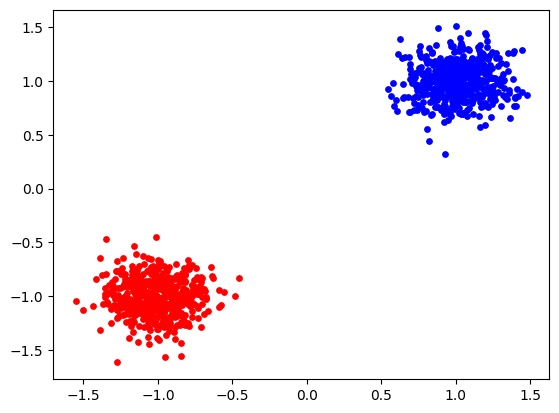

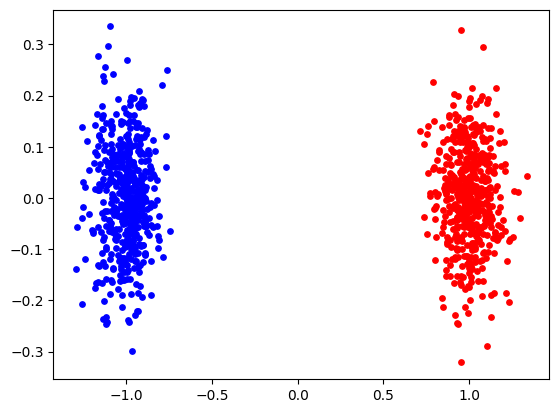

In [58]:
diag_df = diagonales(1000, 3, 0.1)
plot_results(diag_df)

diag_df = paralelas(1000, 3, 0.1)
plot_results(diag_df)

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

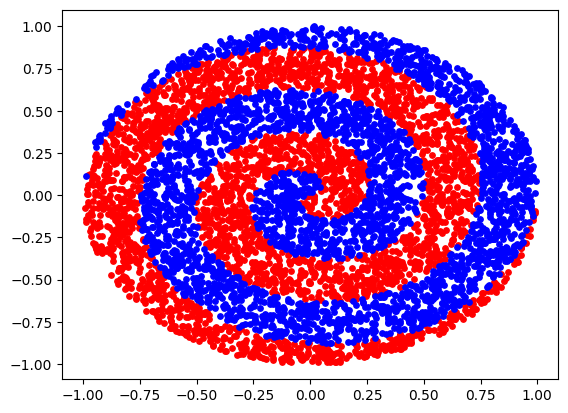

In [59]:
def espirales(n):

  # Generar puntos en coordenadas polares
  n_per_class = n // 2
  g1 = []
  g2 = []
  
  while (len(g1) < n_per_class or  len(g2) < n_per_class):

    # Generar punto aleatorio en un círculo de radio 1
    r = np.sqrt(np.random.uniform(0, 1))
    theta = np.random.uniform(-2 * np.pi, 5 * np.pi)

    # Convertir a coordenadas cartesianas
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Determinar la clase del punto
    condition1 = (r >= theta / (4 * np.pi)) and (r <= (theta + np.pi) / (4 * np.pi))
    condition2 =  (r <= theta / (4 * np.pi)) and (r >= (theta - np.pi) / (4 * np.pi))

    if condition1 and len(g1) < n_per_class:
      g1.append((x, y))
    elif condition2 and len(g2) < n_per_class:
      g2.append((x, y))
        
  data1 = np.array(g1)
  data2 = np.array(g2)

  data = [[0, *x] for x in data1] + [[1, *x] for x in data2]
  df = pd.DataFrame(data, columns=(['Clase'] + ['d' + str(x + 1) for x in range(2)]))

  return df

n = 6000
df = espirales(n)
plot_results(df)

# Trabajo Práctico Arboles de decisión

# Ejercicio 1

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score


def trainTreePlot(df, dfTest):

  xTest = [list (a) for a in zip(dfTest[ 'd1' ].to_numpy(), dfTest[ 'd2' ].to_numpy())]

  X = [list (a) for a in zip(df[ 'd1' ].to_numpy(), df[ 'd2' ].to_numpy())]
  y = np.concatenate([np.zeros(len( df[ df['Clase'] == 0 ])), np.ones(len( df[ df['Clase'] == 1 ]))])

  clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
  clf.fit(X, y)
  
  res = clf.predict(xTest)
  clase1 = [xTest[i] for i in range(len(xTest)) if res[i] == 0]
  clase2 = [xTest[i] for i in range(len(xTest)) if res[i] == 1]

  xs0 = [x for [x,y] in clase1]
  ys0 = [y for [x,y] in clase1]
  xs1 = [x for [x,y] in clase2]
  ys1 = [y for [x,y] in clase2]
  
  plt.scatter(xs0, ys0, color='red', s=15)
  plt.scatter(xs1, ys1, color='blue', s=15)

  plt.show()

esp1 = espirales(150)
esp2 = espirales(600)
esp3 = espirales(3000)

espU = espirales(10000)

### A continuación se grafican las predicciones sobre el conjunto de test de los arboles de decisión entrenados con distintos conjuntos de entrenamiento:
Longitud del conjunto de entrenamiento: 300

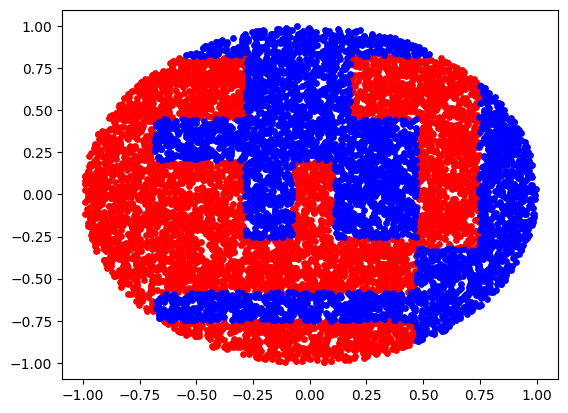

In [61]:
trainTreePlot(esp1, espU)

Longitud del conjunto de entrenamiento: 600

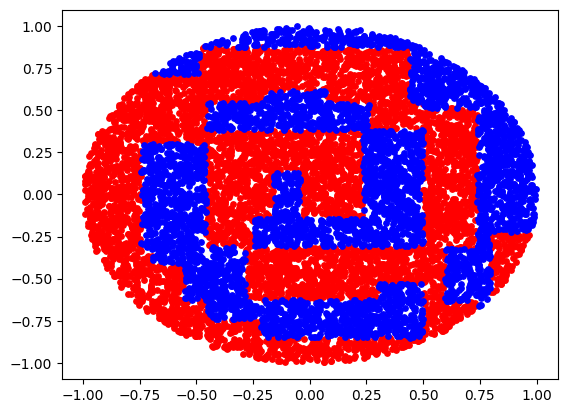

In [62]:
trainTreePlot(esp2, espU)

Longitud del conjunto de entrenamiento: 3000

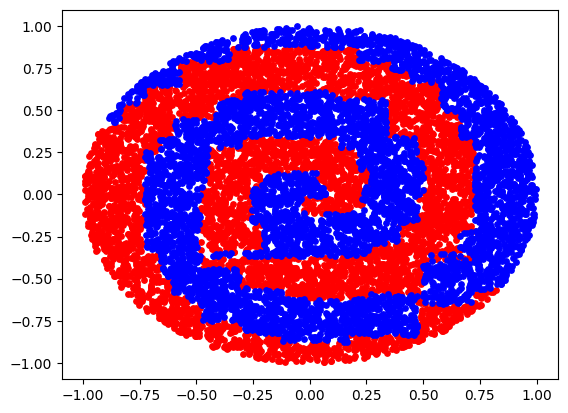

In [63]:
trainTreePlot(esp3, espU)

#### Comentarios:
En el caso del arbol entrenado en base a 150 puntos, podemos notar que se produce sobreajuste, ya que los datos no son suficientes para predecir el comportamiento general del espiral.
Podemos observar que a medida que aumenta el tamaño del conjunto de datos sobre el cuál se entrena el árbol de decisión, la predicción sobre el conjunto de test se vuelve mas acertada.
En particular, al entrenarse sobre el conjunto de 3000 puntos, el arbol tiene la informacion suficiente para capturar la estructura de la espiral.

# Ejercicio 2

In [64]:
def trainTreeData(df, dfTest):
  # Datos de test

  xTest = [list (a) for a in zip(dfTest[ 'd1' ].to_numpy(), dfTest[ 'd2' ].to_numpy())]
  yTest = np.concatenate([np.zeros(len( dfTest[ dfTest['Clase'] == 0 ])), np.ones(len( dfTest[ dfTest['Clase'] == 1 ]))])

  # Datos de entrenamiento
  xTrain = [list (a) for a in zip(df[ 'd1' ].to_numpy(), df[ 'd2' ].to_numpy())]
  yTrain = np.concatenate([np.zeros(len( df[ df['Clase'] == 0 ])), np.ones(len( df[ df['Clase'] == 1 ]))])

  clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
  clf.fit(xTrain, yTrain)

  errTrain = 1 - clf.score(xTrain, yTrain)
  errTest = 1 - clf.score(xTest, yTest)
  node_count = clf.tree_.node_count

  return errTrain, errTest, node_count

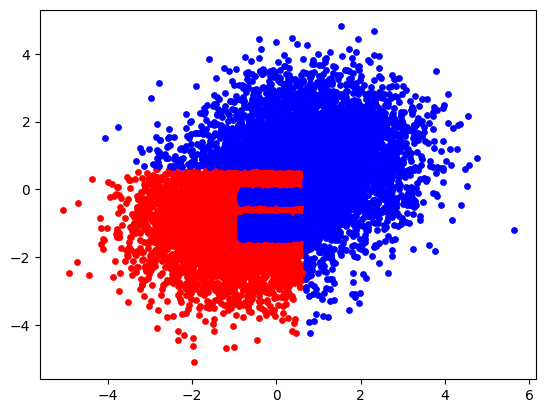

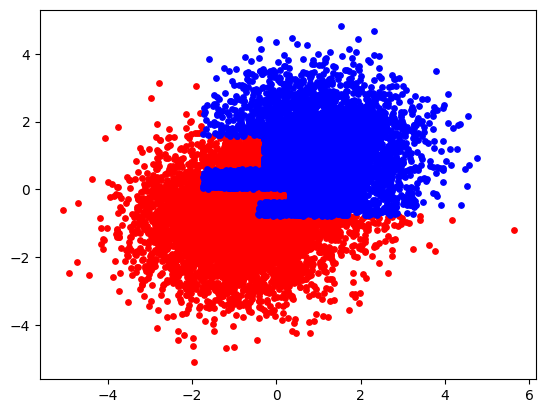

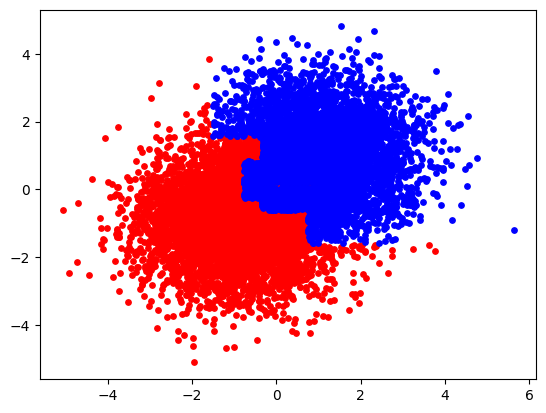

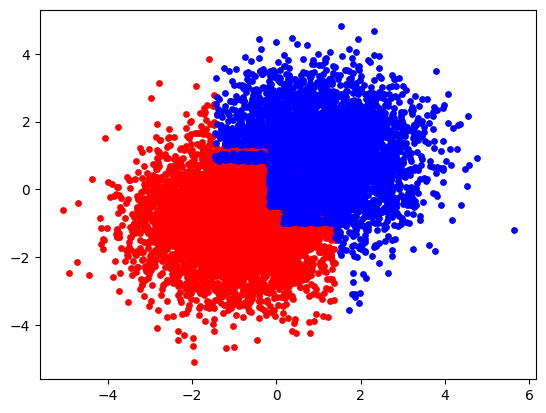

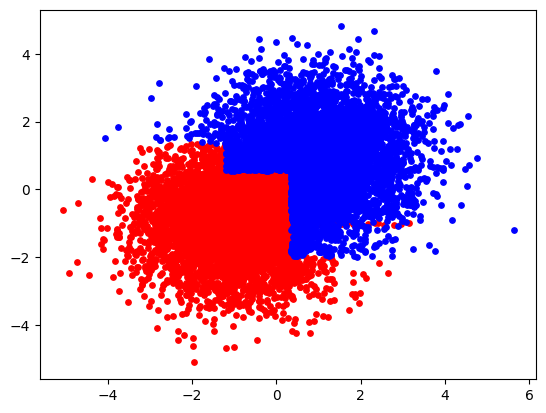

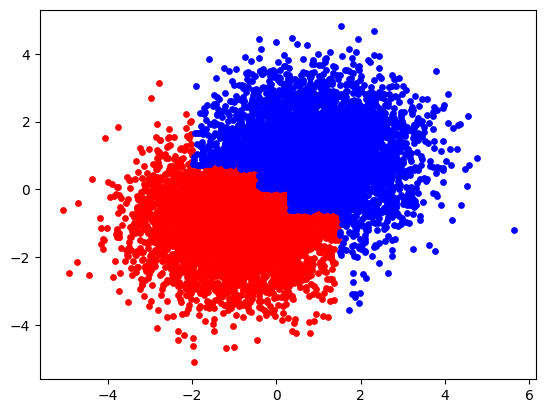

In [65]:
def multiTest(funGen):
  val = [125, 250, 500, 1000, 2000, 4000]
  dfTest = funGen(10000, 2, 0.78)
  res = []
  for v in val:
    errTrainTot = errTestTot = nodeCountTot = 0
    dfTrain = funGen(v, 2, 0.78)
    trainTreePlot(dfTrain, dfTest)

    for n in range(20):
      errTrain, errTest, node_count = trainTreeData(funGen(v, 2, 0.78), dfTest)
      errTrainTot += errTrain
      errTestTot += errTest
      nodeCountTot += node_count
    errTrainAvg = errTrainTot / 20
    errTestAvg = errTestTot / 20
    nodeCountAvg = nodeCountTot / 20
    res.append([v, errTrainAvg, errTestAvg, nodeCountAvg])

  return res
      
resDiagonales = multiTest(diagonales)

### Comentarios diagonales
Podemos ver que a medida que aumenta el conjunto de datos de entrenamiento, el arbol de decision interpreta de forma mas precisa cada conjunto.
En conjuntos de entrenamiento con pocos datos vemos claramente que se produce sobreajuste. Esto se produce porque el modelo aprende de un patron particular del conjunto de entrenamiento que no se cumple en el caso general, pero extrapola dicho comportamiento al conjunto de test, provocando una inferencia incorrecta.

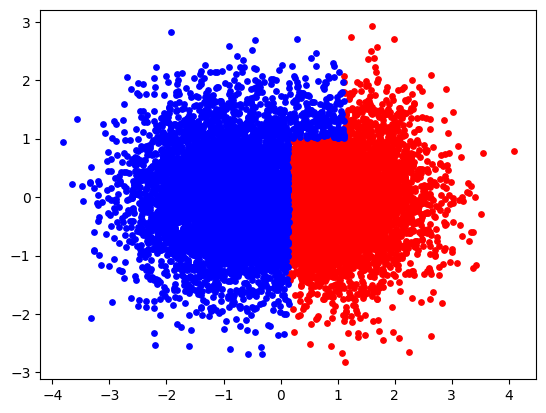

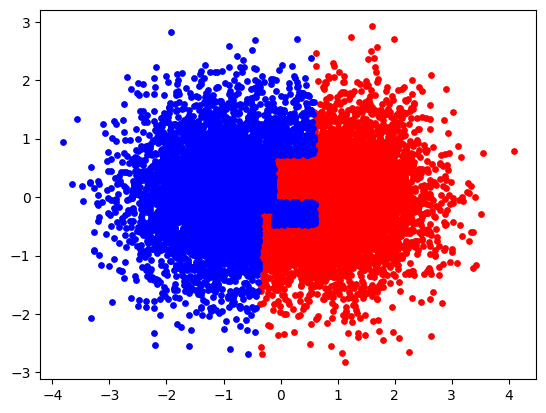

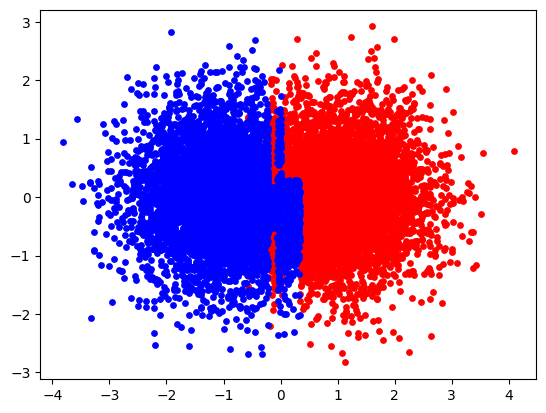

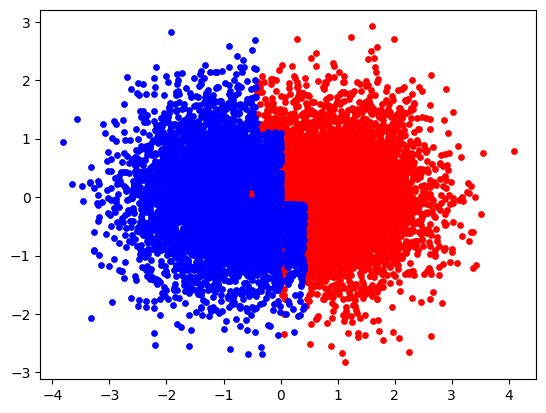

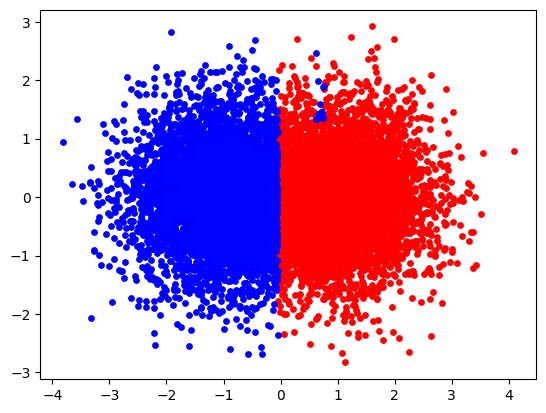

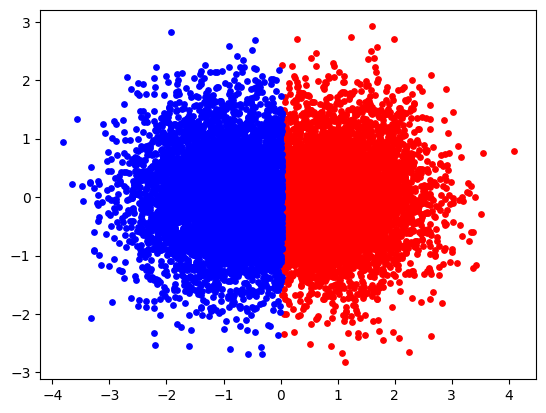

In [66]:
resParalelas = multiTest(paralelas)

### Comentarios paralelas
De forma análoga al test realizado con las diagonales, puede verse claramente que al aumentar el conjunto de entrenamiento, el arbol infiere mejor sobre el conjunto de test.
Y de la misma forma, se produce un sobreajuste en los conjuntos de test con pocos datos.


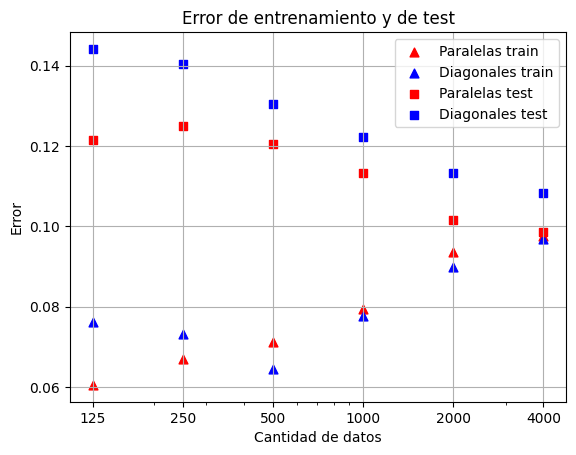

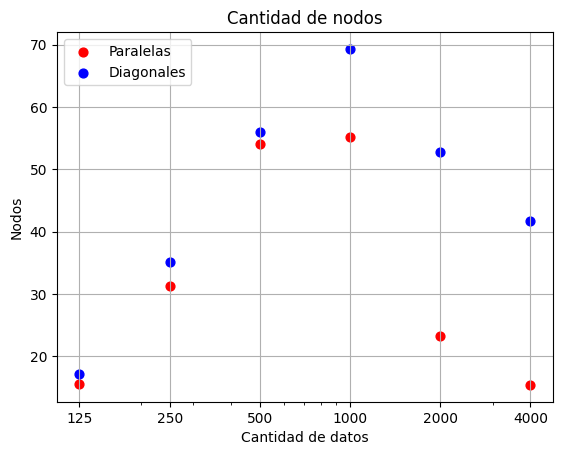

In [67]:
# Grafica de error de entrenamiento
xs = [x for [x, _, _, _] in resParalelas]
ys = [y for [_, y, _, _] in resParalelas]
plt.scatter(xs, ys, color='red', s=40, marker='^', label='Paralelas train')

xs = [x for [x, _, _, _] in resDiagonales]
ys = [y for [_, y, _, _] in resDiagonales]
plt.scatter(xs, ys, color='blue', s=40, marker='^', label='Diagonales train')

# Grafica de error de test
xs = [x for [x, _, _, _] in resParalelas]
ys = [z for [_, _, z, _] in resParalelas]
plt.scatter(xs, ys, color='red', s=40, marker='s', label='Paralelas test')

xs = [x for [x, _, _, _] in resDiagonales]
ys = [z for [_, _, z, _] in resDiagonales]
plt.scatter(xs, ys, color='blue', s=40, marker='s', label='Diagonales test')

labels=[str(size) for size in xs]
plt.xscale('log')
plt.xticks(xs, labels)
plt.title('Error de entrenamiento y de test')
plt.xlabel('Cantidad de datos')
plt.ylabel('Error')
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

# Grafica de cantidad de nodos
xs = [x for [x, _, _, _] in resParalelas]
ys = [w for [_, _, _, w] in resParalelas]
plt.scatter(xs, ys, color='red', s=40, label='Paralelas')

xs = [x for [x, _, _, _] in resDiagonales]
ys = [w for [_, _, _, w] in resDiagonales]
plt.scatter(xs, ys, color='blue', s=40, label='Diagonales')

labels=[str(size) for size in xs]
plt.xscale('log')
plt.xticks(xs, labels)
plt.title('Cantidad de nodos')
plt.xlabel('Cantidad de datos')
plt.ylabel('Nodos')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()



### Comentarios

Con respecto a la cantidad de nodos del árbol de decision, vemos como el arbol generado por el dataset de paralelas tiende ser mas chico que el de diagonales. Esto puede deberse a que la decision de la clase para cada elemento del conjunto depende de una unica dimension en el caso de las paralelas (el valor de x), mientras que en el caso de las diagonales, para clasificar la clase de cada punto, es necesario analizar tanto el valor de x como el de y, por lo que son necesarios mas nodos para clasificar los puntos.
Cabe destacar tambien que a medida que aumenta el conjunto de datos, disminuye la cantidad de nodos del arbol. Esto puede deberse al podado (pruning) de los nodos, que se realiza para evitar el overfitting sobre el conjunto de entrenamiento.

Analizando ambas gráficas en conjunto, notamos que la cantidad de nodos para datasets es baja cuando la cantidad de datos es bajo, el error sobre los datos de entrenamiento tambien resulta muy bajo, mientras que el error en el caso de test es muy alto. Esto nos demuestra el alto grado de overfitting que se produce con un conjunto reducido de datos. El modelo se adapta a las particularidades del conjunto de entrenamiento, haciendo que sea muy efectivo para este conjunto, pero genere muchos errores de inferencia en el caso general.
Mientras que a medida que aumenta la cantidad de datos, a pesar de que disminuye la cantidad de nodos, el error para el conjunto de test disminuye, y el error para el conjunto de entrenamiento aumenta. Esto refuerza la teoria destacada en el punto anterior, en la que destacamos que al realizar pruning, el arbol evita el sobreajuste, "desaprende" las particularidades del conjunto de entrenamiento, e infiere mejor en el caso general.

## Ejercicio 3


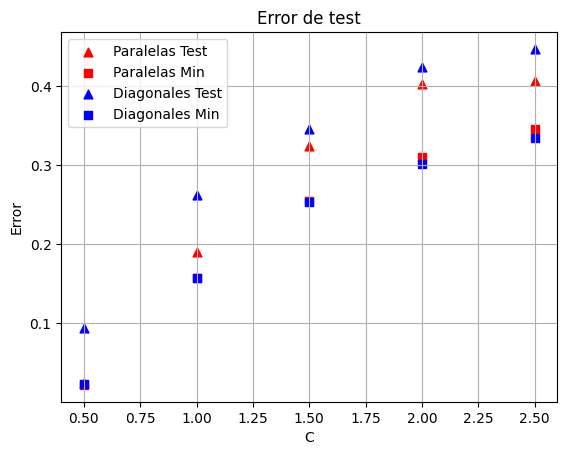

In [68]:
def trainTreeDataError(df, dfTest):
  # Datos de test
  xTest = dfTest.drop('Clase', axis=1).to_numpy()
  yTest = np.concatenate([np.zeros(len( dfTest[ dfTest['Clase'] == 0 ])), np.ones(len( dfTest[ dfTest['Clase'] == 1 ]))])

  # Datos de entrenamiento
  xTrain = df.drop('Clase', axis=1).to_numpy()
  yTrain = np.concatenate([np.zeros(len( df[ df['Clase'] == 0 ])), np.ones(len( df[ df['Clase'] == 1 ]))])

  clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
  clf.fit(xTrain, yTrain)
  errTest = 1 - clf.score(xTest, yTest)

  return errTest


def getErrMin(dfTest, funName):
  # Datos de test
  xTest = dfTest.drop('Clase', axis=1).to_numpy()
  yTest = np.concatenate([np.zeros(len( dfTest[ dfTest['Clase'] == 0 ])), np.ones(len( dfTest[ dfTest['Clase'] == 1 ]))])

  yBest = []
  for x in xTest:
      # Caso paralelas:
      if funName == "paral":
        if x[0] > 0:
          yBest.append(0)
        elif x[0] < 0:
          yBest.append(1)
        else:
          yBest.append(random.randint(0, 1))
      else:
        # Caso diagonales:
        tot = 0
        for i in range(len(x)):
          tot += x[i]
        if tot > 0:
          yBest.append(1)
        elif tot < 0:
          yBest.append(0)
        else:
          yBest.append(random.randint(0, 1))
    
  errMin = 1 - accuracy_score(yBest, yTest)
  return errMin

cList = [0.5, 1, 1.5, 2, 2.5]

def multiTestC(funGen, funName):
  res = []
  for c in cList:
    dfTest = funGen(10000, 5, c)
    dfTrain = funGen(250, 5, c)

    # Error de test promedio
    errTestTot = 0
    for n in range(20):
      errTest = trainTreeDataError(dfTrain, dfTest)
      errTestTot += errTest
    errTestAvg = errTestTot / 20

    # Error minimo
    errMin = getErrMin(dfTest, funName)

    res.append([c, errTestAvg, errMin])

    
  
  return res
      
resDiagonalesC = multiTestC(diagonales, "diag")
resParalelasC = multiTestC(paralelas, "paral")

# Grafica de error de test
xs = [x for [x, _, _] in resParalelasC]
ys1 = [y for [_, y, _] in resParalelasC]
ys2 = [z for [_, _, z] in resParalelasC]
size = 40
plt.scatter(xs, ys1, color='red', s=size, marker='^', label='Paralelas Test')
plt.scatter(xs, ys2, color='red', s=size, marker='s', label='Paralelas Min')

xs = [x for [x, _, _] in resDiagonalesC]
ys1 = [y for [_, y, _] in resDiagonalesC]
ys2 = [z for [_, _, z] in resDiagonalesC]
plt.scatter(xs, ys1, color='blue', s=size, marker='^', label='Diagonales Test')
plt.scatter(xs, ys2, color='blue', s=size, marker='s', label='Diagonales Min')

plt.title('Error de test')
plt.xlabel('C')
plt.ylabel('Error')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()



A medida que aumenta el valor de C, también lo hace la desviación estándar de los datos generados, tanto en las diagonales como en las paralelas. Esto significa que la distancia de los puntos al centro de su distribución aumenta, por lo que más puntos tendrán, por ejemplo, la etiqueta 0, cuando estadísticamente, debido a su ubicación, es más probable que tengan la etiqueta 1. Esto genera ruido en el conjunto de datos.
Al aumentar C, aumenta tambien el ruido, por lo que el arbol tiene mas problemas para clasificar los puntos, aumentando asi su error de inferencia.

Para obtener el error minimo en cada arbol de decision, consideramos un clasificador ideal para cada conjunto de datos, y lo medimos sobre conjuntos de 10k puntos.

Para obtener el error minimo de paralelas, dado que las clases tienen centros en ( 1, 0, 0, .... , 0 ) y en ( -1, 0, 0, .... , 0 ), el valor de la primera componente es el unico que nos resulta relevante para la clasificacion de los puntos. Es por esto que el clasificador compara  los valores de la primera componente de cada punto, y determina las clases segun si dicho valor es mayor o menor a cero.

Para obtener el error minimo en el caso de las diagonales, como los centros de las distribuciones son (1, 1, 1, ... ,1) y (-1, -1, -1, ... , -1), una forma de obtener un clasificador es comparar la distancia entre el punto a analizar y los dos centros de las distribuciones, y segun cual es menor, clasificar su clase.
Sin embargo, una forma mas eficiente de clasificarlos es realizar la suma de sus componentes. Y en caso de que esta suma sea mayor o menor a cero, dicho punto pertenece a la clase 0 o 1.

En el grafico de arriba podemos ver el error sobre el conjunto de test para cada valor de C, y vemos como el error minimo calculado es efectivamente menor que el error cometido por el arbol de decision. La diferencia entre estos dos errores se mantiene similar, ya que a pesar de que aumenta C, el conjunto de entrenamiento sobre el que se entreno el arbol se mantiene en 250 elementos. 

# Ejercicio 4: Dimensionalidad


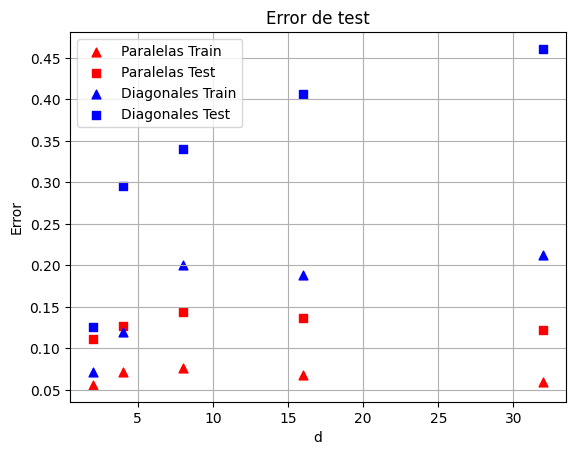

In [69]:
dList = [2, 4, 8, 16, 32]

def multiTestC(funGen, funName):
  res = []
  for d in dList:
    dfTest = funGen(10000, d, 0.78)
    dfTrain = funGen(250, d, 0.78)

    # Error de train y test promedio
    errTestTot = 0
    errTrainTot = 0
    node_count = 0
    for n in range(20):
      errTrain, errTest, node_count = trainTreeData(dfTrain, dfTest)
      errTrainTot += errTrain
      errTestTot += errTest
    errTrainAvg = errTrainTot / 20
    errTestAvg = errTestTot / 20


    res.append([d, errTrainAvg, errTestAvg])
  return res
      
resDiagonalesC = multiTestC(diagonales, "diag")
resParalelasC = multiTestC(paralelas, "paral")

# Grafica de error de test
xs = [x for [x, _, _] in resParalelasC]
ys1 = [y for [_, y, _] in resParalelasC]
ys2 = [z for [_, _, z] in resParalelasC]
size = 40
plt.scatter(xs, ys1, color='red', s=size, marker='^', label='Paralelas Train')
plt.scatter(xs, ys2, color='red', s=size, marker='s', label='Paralelas Test')

xs = [x for [x, _, _] in resDiagonalesC]
ys1 = [y for [_, y, _] in resDiagonalesC]
ys2 = [z for [_, _, z] in resDiagonalesC]
plt.scatter(xs, ys1, color='blue', s=size, marker='^', label='Diagonales Train')
plt.scatter(xs, ys2, color='blue', s=size, marker='s', label='Diagonales Test')

plt.title('Error de test')
plt.xlabel('d')
plt.ylabel('Error')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

#### Comentarios

En la grafica de arriba se puede apreciar como el error de entrenamiento es mucho mas bajo que el error en el conjunto de test. Una vez mas, esto se debe al overfitting producido por el escaso conjunto de datos de entrenamiento (250).

Sin embargo, un patron importante a destacar es que el error de las diagonales es considerablemente mayor al error de las paralelas a medida que aumenta el numero de dimensiones sobre las cuales se realiza la inferencia, mientras que el error de las paralelas se mantiene casi constante. 

Esto puede deberse a lo mencionado anteriormente sobre que la clasificacion de los puntos del conjunto de paralelas depende solo de la primera dimension de los puntos. Por lo que sin importar el valor de d, el analisis se mantiene igual. Mientras que en el caso de las diagonales, a medida que aumenta el valor de d, aumentan las variables de los datos a analizar, por lo que el arbol de decision necesitara cada vez mas datos para inferir correctamente el comportamiento del conjunto de test.


# Ejercicio 5

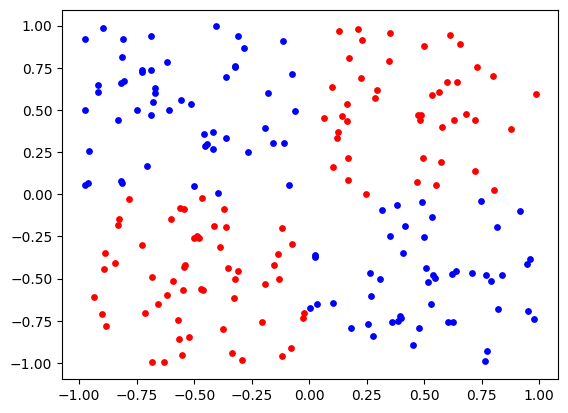

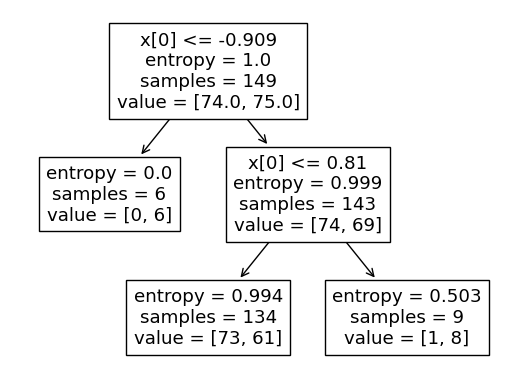

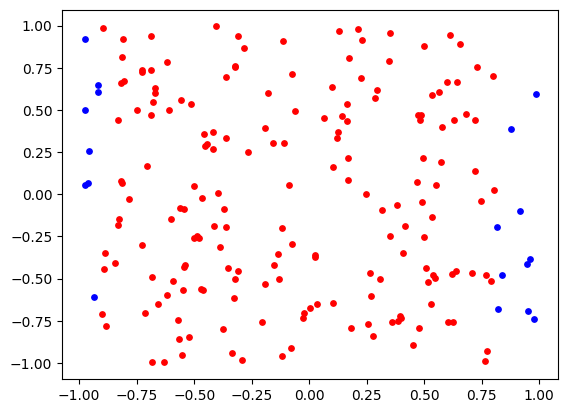

In [70]:

df = pd.read_csv('xor.csv')

df.columns = ["d1", "d2", "Clase"]

plot_results(df)

# Datos de test
X = df.drop('Clase', axis=1).to_numpy()
y = np.concatenate([np.zeros(len( df[ df['Clase'] == 0 ])), np.ones(len( df[ df['Clase'] == 1 ]))])


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.03,random_state=0,min_samples_leaf=5) 

clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.show()

y_pred = clf.predict(X)

data = [[y_pred[i], *X[i]] for i in range(len(y_pred))]

df = pd.DataFrame(data, columns=(['Clase'] + ['d' + str(x + 1) for x in range(2)]))

plot_results(df)


#### Comentarios

El arbol mas simple que clasifica los puntos correctamente es en el cual se realiza la divison de (x[0] < 0), y luego, sobre cada rama, se divide en (x[1] < 1). La representacion del arbol en forma de disjuncion de conjunciones resulta ser la definicion de la operacion XOR.

En cuanto al arbol generado por sklearn, el modo de generacion del arbol de decision se puede considerar como un algoritmo avaro (greedy). Es decir, en cada paso que realiza, intenta tomar el camino que lo lleve a un mejor resultado inmediato. En el caso particular de los arboles de decision, esto significa hacer la division de los datasets segun el parametro que genera la mayor reduccion de entropia. Esto es, que realize una mayor division de los datos a clasificar.
Es por esto, por la falta de capacidad del algoritmo de calcular la diferencia de entropia en mas de un paso, que genera un resultado deficiente al clasificar el conjunto del XOR. 

El paso lógico sería realizar la divison de (x[0] < 0), y luego, sobre cada rama, analizar (x[1] < 1). Esto da como resultado la representacion del XOR. Pero al realizar la primera division mencionada, el cambio de entropia es nulo, ya que existen la misma cantidad de puntos de cada clase en cada conjunto resultante. Es por esto que el algoritmo elige no tomar este camino, y llega a un arbol de decision suboptimo.